<a href="https://colab.research.google.com/github/reve-0212/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [ ]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
print('1. 결측치 여부 확인(isnull) : ', df.isnull())
print('2. 결측치 여부 확인(isna) : ', df.isna())

## 열별, 행별 결측치 개수 확인
print('3. 열별 결측치 갯수 : ', df.isnull().sum())
print('4. 행별 결측치 갯수 : ', df.isnull().sum(axis=1))

## 특정 열, 행 결측치 확인
print('5. 결측치가 있는 행 : ', df[df.isnull().any(axis=1)])
print('6. 나이에 결측치가 있는 행 : ', df[df['나이'].isnull()])
print('7. 결측치가 아닌 항목 확인 (notnull) : ', df.notnull())

## 결측치가 아닌 항목 확인
missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) *100

## 결측치 비율
print(f'8. 전체 데이터 중 결측치 비율 : {missing_percentage:.2f}%')

1. 결측치 여부 확인(isnull) :        이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False
2. 결측치 여부 확인(isna) :        이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False
3. 열별 결측치 갯수 :  이름    0
나이    1
도시    1
점수    1
dtype: int64
4. 행별 결측치 갯수 :  0    0
1    1
2    2
3    0
4    0
dtype: int64
5. 결측치가 있는 행 :      이름    나이    도시    점수
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
6. 나이에 결측치가 있는 행 :      이름  나이  도시  점수
2  박민수 NaN  인천 NaN
7. 결측치가 아닌 항목 확인 (notnull) :       이름     나이     도시     점수
0  True   True   True   True
1  True   True  False   True
2  True  False   True  False
3  True   True   True   True
4  True   True   True   True
8. 전체 데이터 중 결측치 비율 : 15.00%


### 7-2 데이터 시각화를 이용한 결측치 찾기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

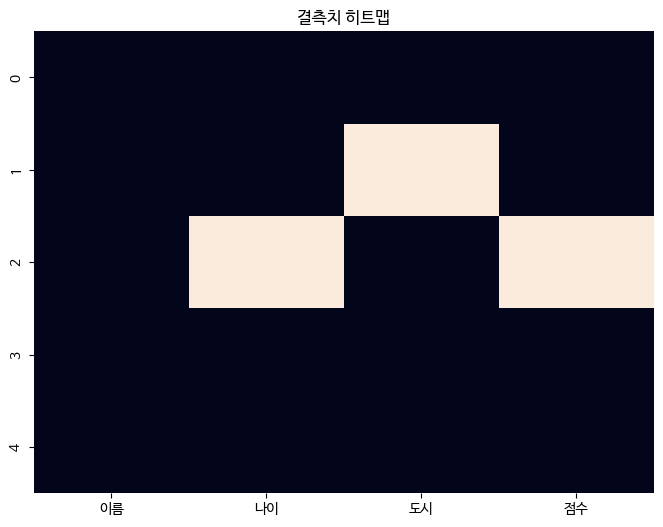

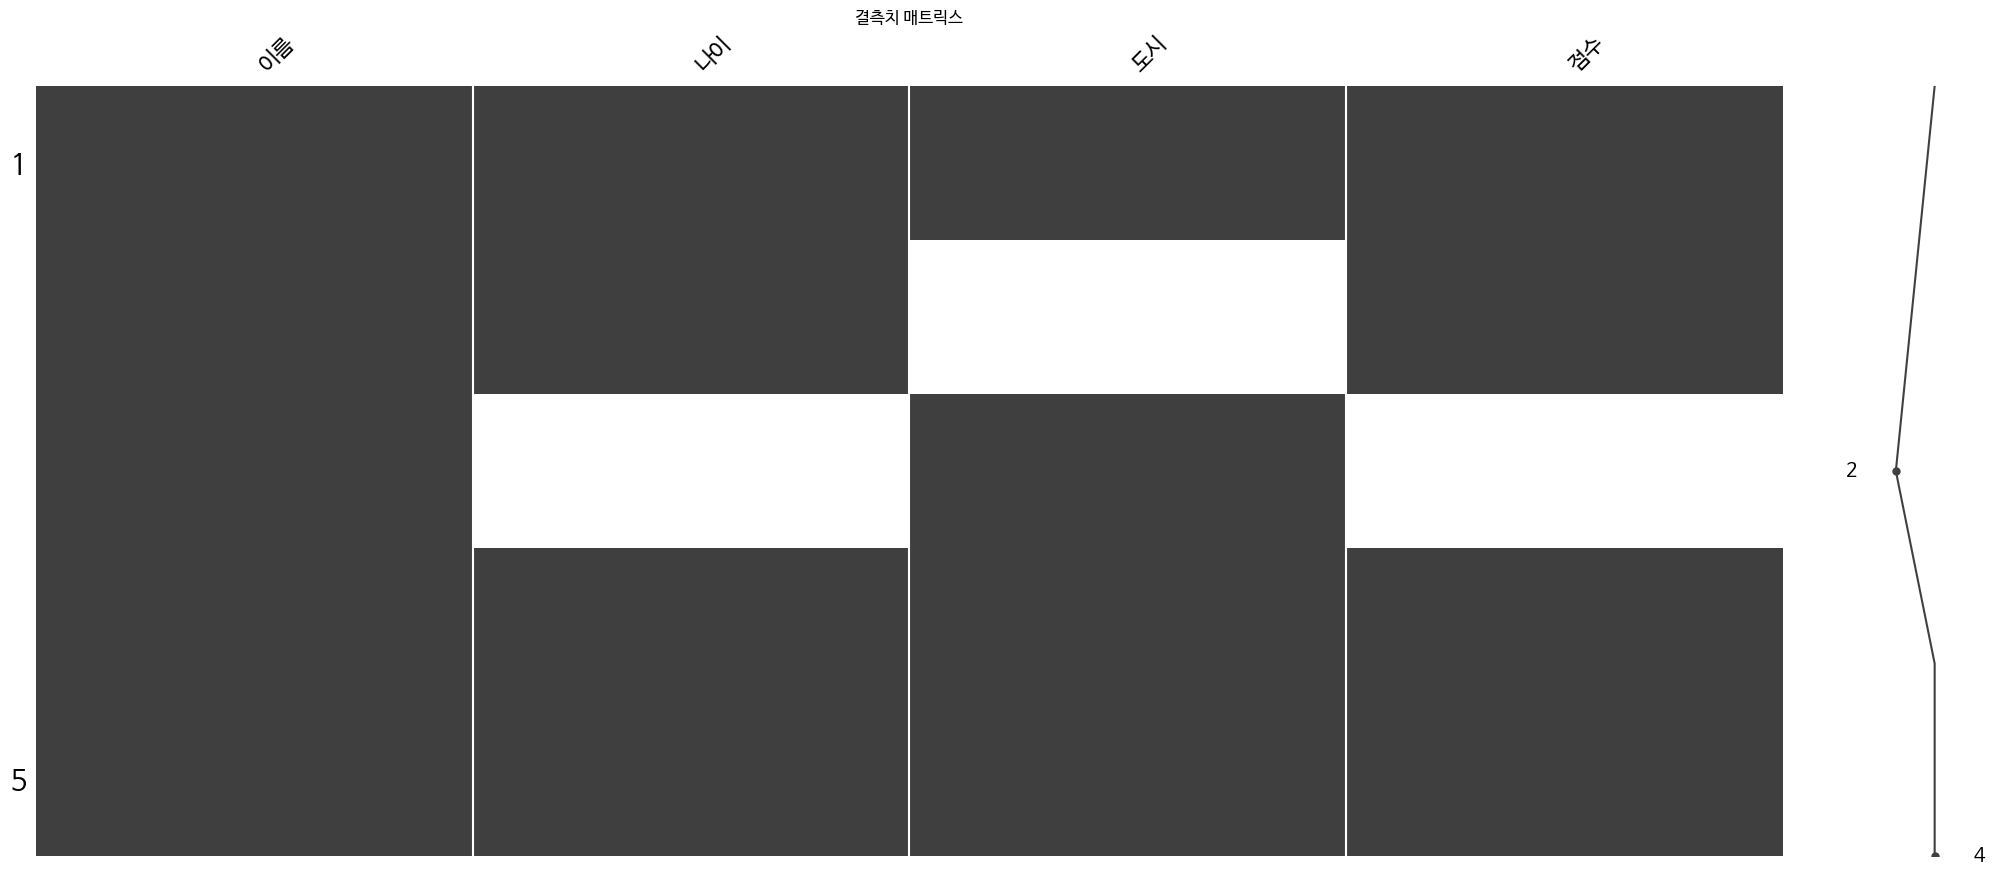

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### 시각화 라이브러리 임포트

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
Q1 = df['점수'].quantile(0.25)
Q3 = df['점수'].quantile(0.75)
IQR = Q3 - Q1
하한값 = Q1 - 1.5 * IQR
상한값 = Q3 + 1.5 * IQR

### IQR 통계량 출력
print('IQR 통계량')
print(f'Q1 (25% 지점) : {Q1:.2f}')
print(f'Q3 (75% 지점) : {Q3:.2f}')
print(f'IQR (Q3 - Q1): {IQR:.2f}')
print(f'하한 경계값 (q1 - 1.5 * iqr) : {하한값:.2f}')
print(f'상한 경계값 (q3 + 1.5 *iqr) : {상한값:.2f}')


IQR 통계량
Q1 (25% 지점) : 63.25
Q3 (75% 지점) : 85.00
IQR (Q3 - Q1): 21.75
하한 경계값 (q1 - 1.5 * iqr) : 30.62
상한 경계값 (q3 + 1.5 *iqr) : 117.62


### 7-4 Z-점수를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['Z_점수'] = (df['점수'] - 점수_평균) / 점수_표준편차

### 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치여부'] = df['점수'].abs() >임계값

### 이상치 데이터 출력
print('학생 성적 z-score 분석 결과 : ')
print(' = ' *50)
print(df)
print()

print('이상치로 판별된 데이터 : ')
print(' = '*50)
print(df[df['이상치여부']==True])

### 이상치 비율 출력
이상치_비율 = df['이상치여부'].mean() * 100
print(f'이상치 비율 : {이상치_비율 : .2f}%')

학생 성적 z-score 분석 결과 : 
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
      학번   점수      Z_점수  이상치여부
0   1001   72 -0.034475   True
1   1002   68 -0.089635   True
2   1003   75  0.006895   True
3   1004  282  2.861411   True
4   1005   64 -0.144794   True
5   1006   31 -0.599862   True
6   1007   78  0.048265   True
7   1008   69 -0.075845   True
8   1009   88  0.186164   True
9   1010   92  0.241324   True
10  1011   22 -0.723972   True
11  1012   84  0.131004   True
12  1013   61 -0.186164   True
13  1014  -90 -2.268444   True
14  1015  130  0.765341   True
15  1016   66 -0.117214   True

이상치로 판별된 데이터 : 
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
      학번   점수      Z_점수  이상치여부
0   1001   72 -0.034475   True
1   1002   68 -0.089635   True
2   1003   75  0.006895   True
3   100

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1).copy()

### 나이, 소득 평균값 대치 및 결과 출력
for col in ['나이','소득']:
  df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].mean())
print(df_cleaned[['나이','소득']].isnull().sum())

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, ['지출','평균구매횟수']] = df_cleaned[['지출','평균구매횟수']].interpolate(method='linear')
print(df_cleaned[['지출','평균구매횟수']].isnull().sum())

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64
나이    0
소득    0
dtype: int64
지출        0
평균구매횟수    0
dtype: int64


### 7-6 DataFrame 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul','서울')
print('\nSeoul 을 서울로 바꾼 city 열 : \n', df['city'])

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})
print('\nNone 을 미정, Incheon 을 인천으로 바꾼 city 열 : \n', df['city'])

### map을 이용한 값 변경
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
print('\nmap 함수를 이용한 값 변경 : \n', df['city'])
df['age_str'] = df['age'].map(lambda x : f' {x}살' if pd.notna(x) else '알수없음')
print('\n map 함수를 이용한 age 변경 : \n', df['age_str'])

### apply 함수를 이용한 값 변경
df['age_apply'] = df['age'].apply(lambda x : x*2 if pd.notna(x) else None)
print('\napply 함수를 사용한 값 변경 : \n', df['age_apply'])

### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
  age = row['age'] if pd.notna(row['age']) else 0
  score = row['score'] if pd.notna(row['score']) else 0
  return age + score

df['age_plus_score'] = df.apply(age_plus_score, axis=1)
print('\napply 함수를 이용한 행단위 값 변경 : \n', df['age_plus_score'])

### loc 인덱스를 이용한 값 변경
df.loc[df['score']<90, 'score']=90
print('\n점수가 90점 미만인 사람 90점으로 변경 : \n', df)
df['age_where'] = df['age'].where(df['age']>=30, other = 0)
print('\nage가 30 이상인 값만 유지하고 나머지를 0으로 변경\n', df['age_where'])

### where 함수를 이용한 값 변경




Seoul 을 서울로 바꾼 city 열 : 
 0         서울
1       None
2    Incheon
3         서울
4    Daejeon
Name: city, dtype: object

None 을 미정, Incheon 을 인천으로 바꾼 city 열 : 
 0         서울
1         미정
2         인천
3         서울
4    Daejeon
Name: city, dtype: object

map 함수를 이용한 값 변경 : 
 0      NaN
1      NaN
2      NaN
3      NaN
4    대전광역시
Name: city, dtype: object

 map 함수를 이용한 age 변경 : 
 0     25.0살
1     30.0살
2      알수없음
3     22.0살
4     35.0살
Name: age_str, dtype: object

apply 함수를 사용한 값 변경 : 
 0    50.0
1    60.0
2     NaN
3    44.0
4    70.0
Name: age_apply, dtype: float64

apply 함수를 이용한 행단위 값 변경 : 
 0    115.0
1    115.0
2      0.0
3    102.0
4    127.0
Name: age_plus_score, dtype: float64

점수가 90점 미만인 사람 90점으로 변경 : 
     age   city  score age_str  age_apply  age_plus_score
0  25.0    NaN   90.0   25.0살       50.0           115.0
1  30.0    NaN   90.0   30.0살       60.0           115.0
2   NaN    NaN    NaN    알수없음        NaN             0.0
3  22.0    NaN   90.0   22.0살       44.0          

### 7-7 날짜 데이터 타입 다루기


In [ ]:
import pandas as pd

date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
df_date['date'] = pd.to_datetime(df_date['date_str'])
print('\ndatetime 타입으로 변환된 데이터 : \n', df_date)
print('\ndatetime 타입 : \n', df_date['date'].dtype)

### 날짜 데이터 분리
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['weekday'] = df_date['date'].dt.day_name()
print('\n날짜 데이터 분리 : \n', df_date)

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
print('\n날짜 데이터 포맷 변경 (%Y/%m/%d) : \n', df_date)

df_date['date_ymd'] = df_date['date'].dt.strftime('%Y년 %m월 %d일')
df_date['date_dmy'] = df_date['date'].dt.strftime('%d-%m-%Y')
df_date['date_weekday'] = df_date['date'].dt.strftime('%A, %Y-%m-%d')

print('\n다양한 형식의 날짜 포맷 : \n', df_date)




datetime 타입으로 변환된 데이터 : 
      date_str       date
0  2025-07-01 2025-07-01
1  2025-08-01 2025-08-01
2  2025-09-01 2025-09-01

datetime 타입 : 
 datetime64[ns]

날짜 데이터 분리 : 
      date_str       date  year  month  day  weekday
0  2025-07-01 2025-07-01  2025      7    1  Tuesday
1  2025-08-01 2025-08-01  2025      8    1   Friday
2  2025-09-01 2025-09-01  2025      9    1   Monday

날짜 데이터 포맷 변경 (%Y/%m/%d) : 
      date_str       date  year  month  day  weekday date_formatted
0  2025-07-01 2025-07-01  2025      7    1  Tuesday     2025/07/01
1  2025-08-01 2025-08-01  2025      8    1   Friday     2025/08/01
2  2025-09-01 2025-09-01  2025      9    1   Monday     2025/09/01

다양한 형식의 날짜 포맷 : 
      date_str       date  year  month  day  weekday date_formatted  \
0  2025-07-01 2025-07-01  2025      7    1  Tuesday     2025/07/01   
1  2025-08-01 2025-08-01  2025      8    1   Friday     2025/08/01   
2  2025-09-01 2025-09-01  2025      9    1   Monday     2025/09/01   

        date_ymd    d

## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jihyunsim0212","key":"f1355fc0d3691a5412d9c8bdc3571972"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 758MB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [28]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
print('학습 데이터 기본 정보 : ')
display(train.info())

학습 데이터 기본 정보 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


None

In [11]:
# 판매 데이터 기본 통계량
print('판매 데이터의 기본 통계량 : ')
print(train.describe())

# 매장 데이터 기본 정보
print('\n매장 데이터의 기본 정보 : ')
print(stores.head())

# 원유 가격 데이터 기본 정보
print('\n원유 가격 데이터 기본 정보 : ')
print(oil.head())

판매 데이터의 기본 통계량 : 
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

매장 데이터의 기본 정보 : 
         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

원유 가격 데이터 기본 정보 : 
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93

### 데이터 분포 시각화

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

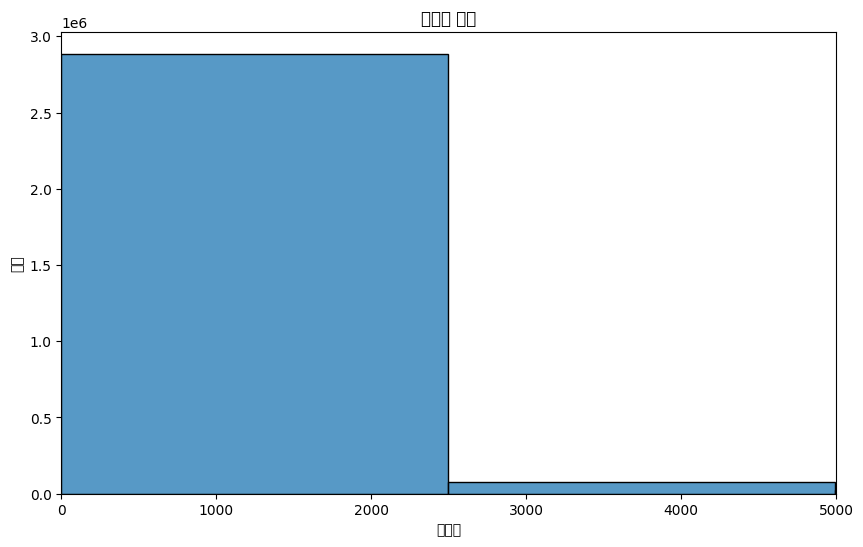

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

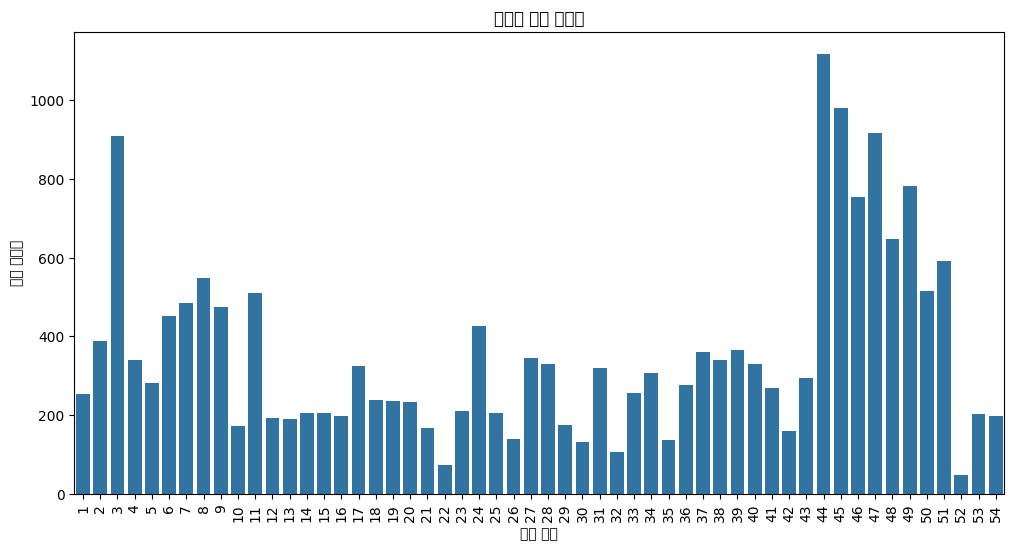

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [15]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print('훈련 데이터 결측치 : ')
print(train.isnull().sum())

print('\n매장 데이터 결측치 : ')
print(stores.isnull().sum())

print('\n원유 데이터 결측치 : ')
print(oil.isnull().sum())

print('\n휴일 데이터 결측치 : ')
print(holidays.isnull().sum())


훈련 데이터 결측치 : 
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

매장 데이터 결측치 : 
date            0
store_nbr       0
transactions    0
dtype: int64

원유 데이터 결측치 : 
date           0
dcoilwtico    43
dtype: int64

휴일 데이터 결측치 : 
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

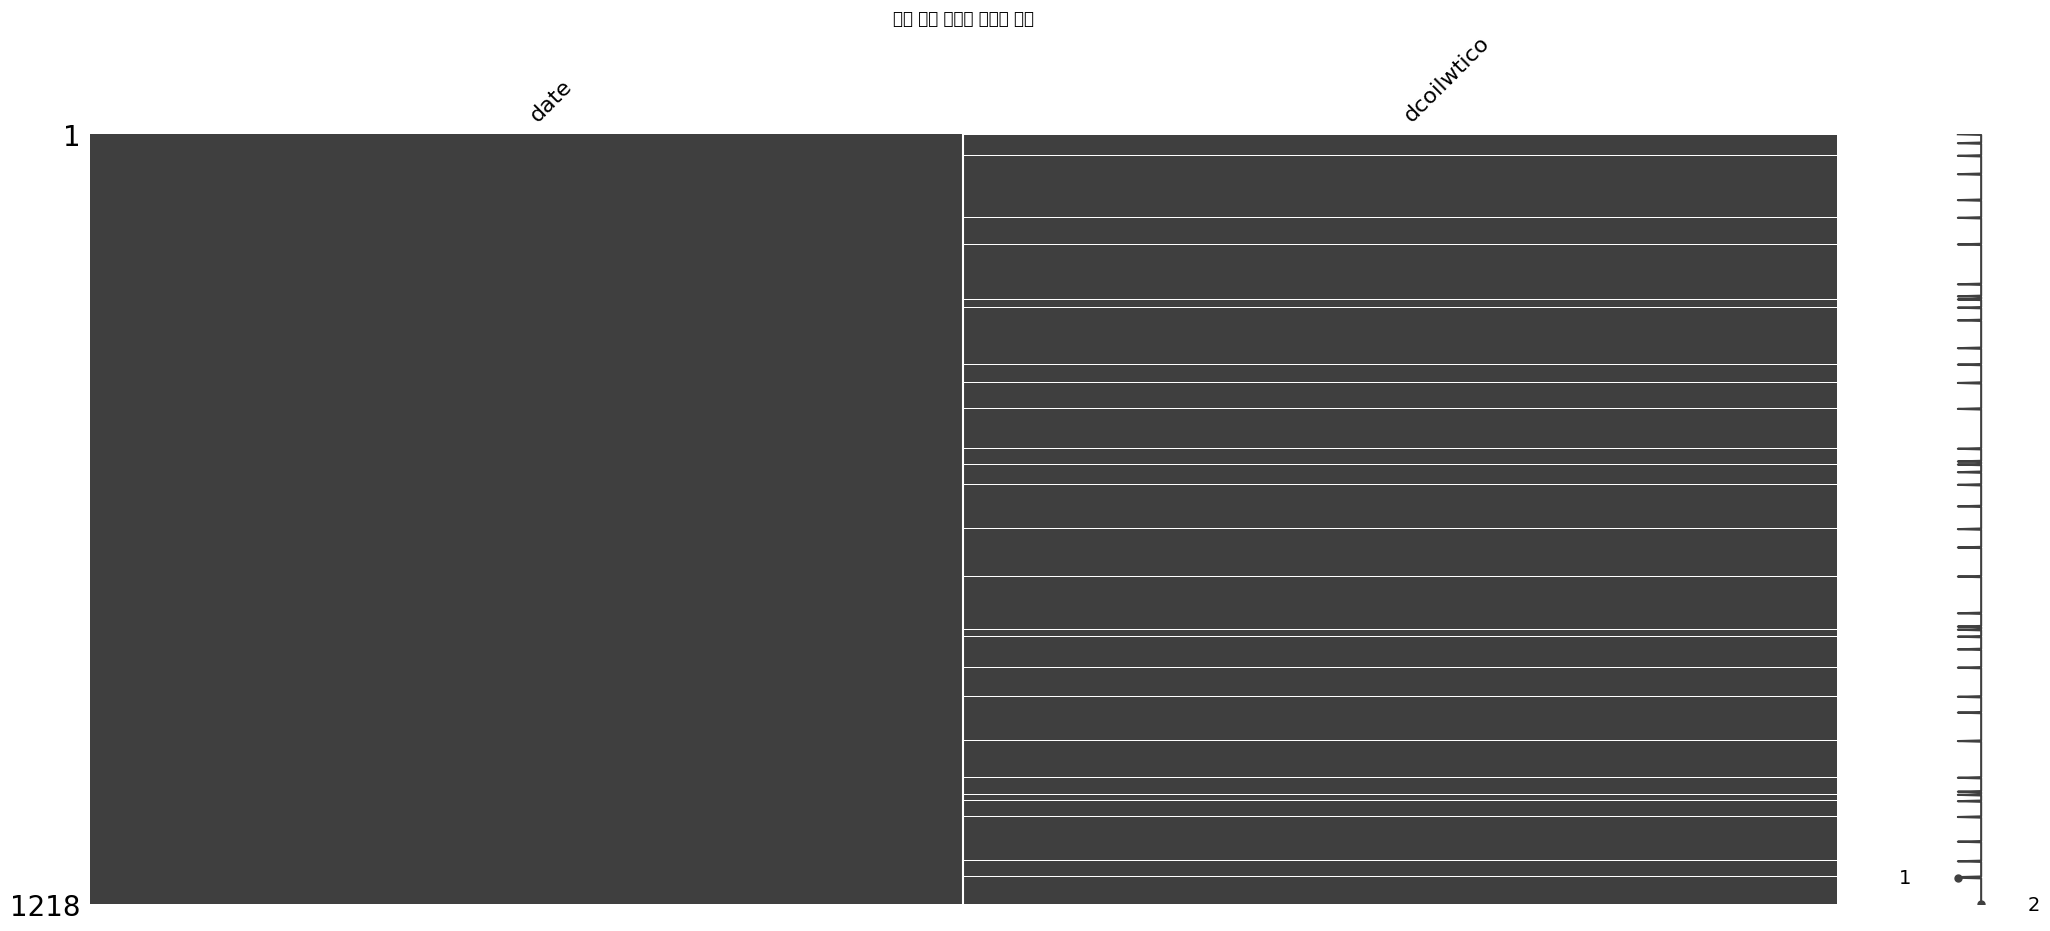

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

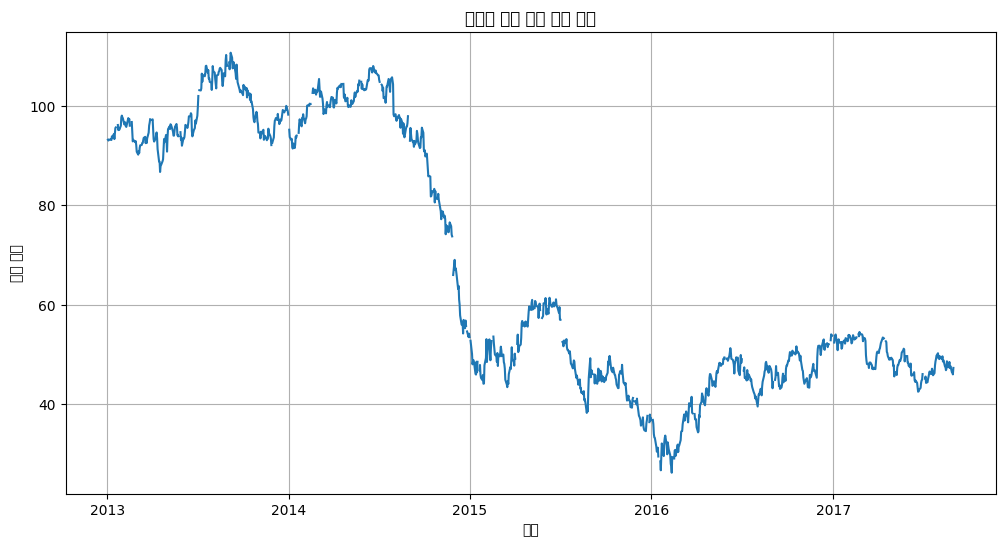

In [16]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()


원유 가격 데이터 결측치 처리 전후 : 
처리 전 결측치 개수 :  43
처리 후 결측치 개수 :  0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

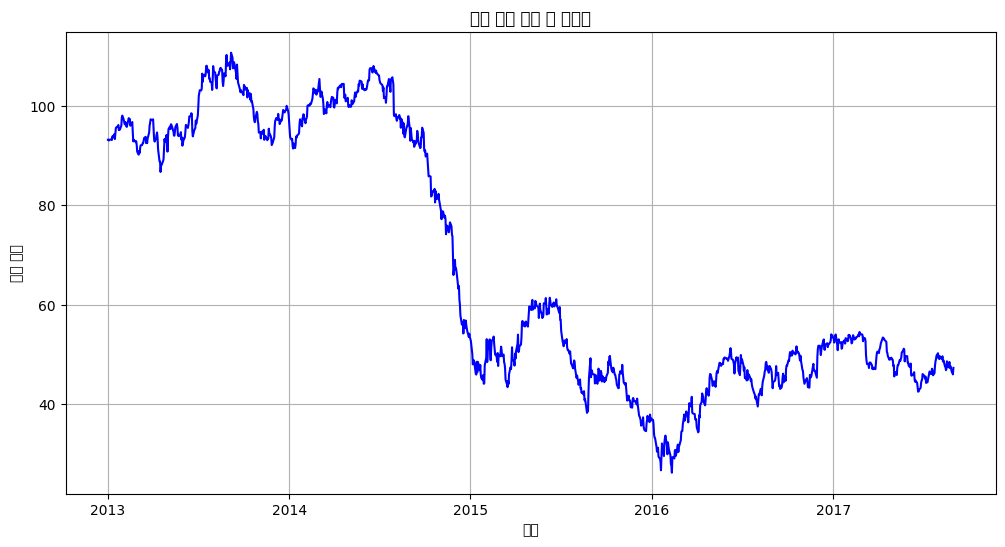

In [17]:
oil_cleaned = oil.copy()
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method='linear', limit_direction = 'both')

### 선형 보간법 적용한 원유 가격 데이터
print('\n원유 가격 데이터 결측치 처리 전후 : ')
print('처리 전 결측치 개수 : ',oil['dcoilwtico'].isnull().sum())
print('처리 후 결측치 개수 : ',oil_cleaned['dcoilwtico'].isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

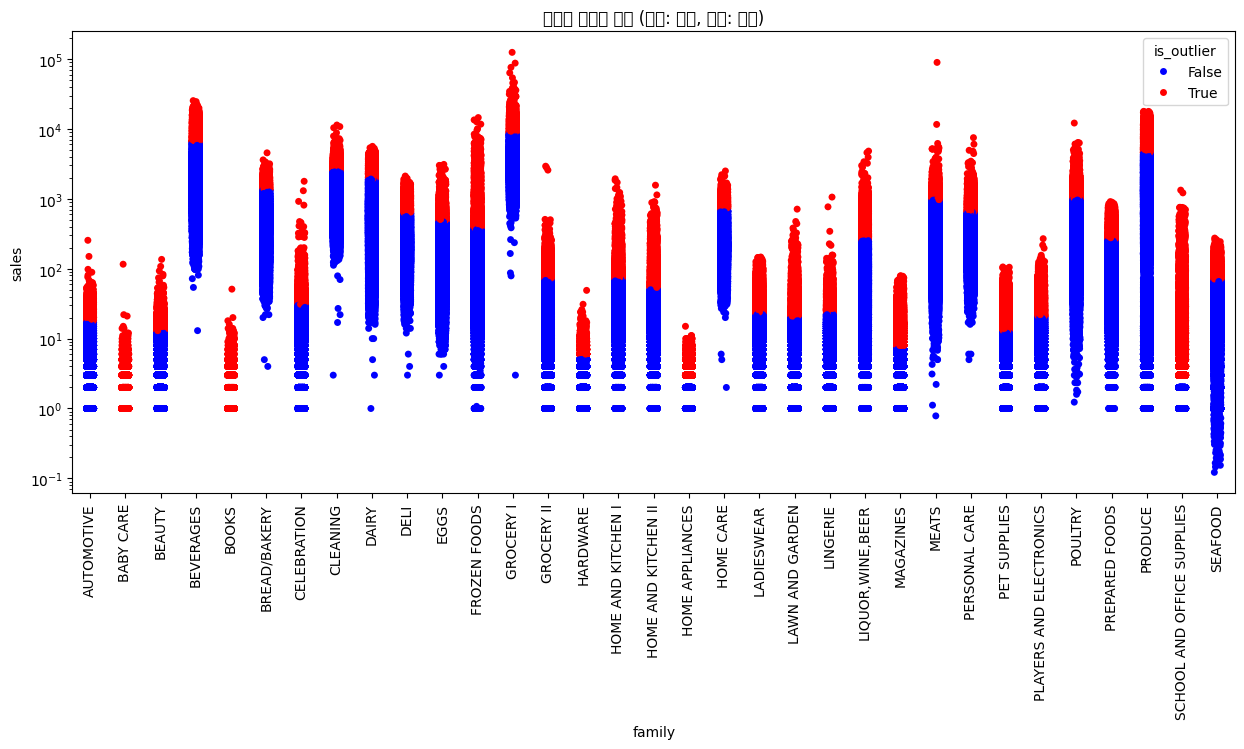

In [19]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    lambda x:x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)

train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

### 상한값 초과 판매량 이상치 분류
total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [24]:
# upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [26]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
stores['date'] = pd.to_datetime(stores['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

### 날짜 데이터 분리
train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek

### 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x : 1 if x>=5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

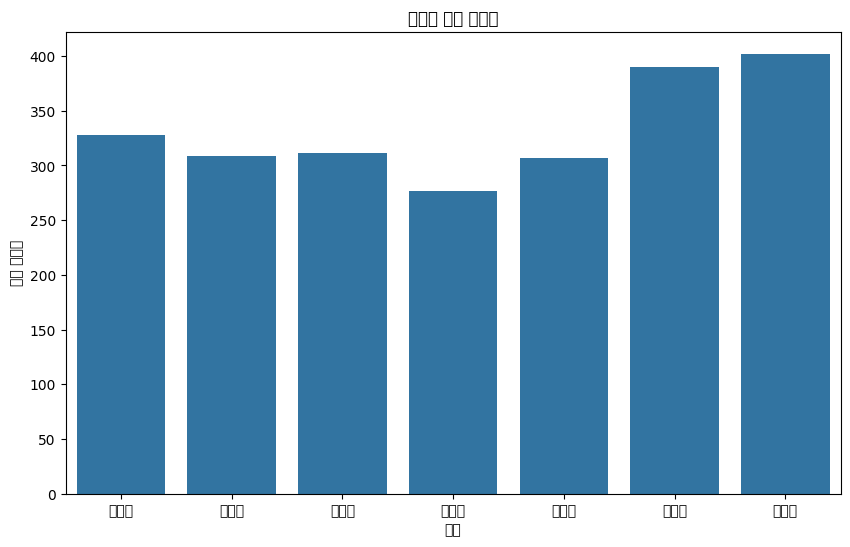

In [27]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()
day_sales['day_name'] = day_sales['dayofweek'].map({
    0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'
})

## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [34]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(train_cleaned, transactions, on=['date','store_nbr'], how='left')

## 매장 데이터 통합
train_with_store = pd.merge(train_with_trans, stores, on='store_nbr', how='left')

## 원유 데이터 통합
train_final = pd.merge(train_with_store, oil_cleaned, on='date', how='left')

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'date'. If you wish to proceed you should use pd.concat